## Importing Data and Pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('synthetic_data.csv')

# Keeping only relevant columns
# User data (role, frequency, purpose) and trip details
transformed_data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

# Renaming BTC for ease of display
transformed_data['ISB_Service'] = transformed_data['ISB_Service'].replace('BTC (Bukit Timah Campus)', 'BTC')

# Conversion of time_start from categorical to datetime for later usage
transformed_data['time_start'] = pd.to_datetime(transformed_data['time_start'])
transformed_data


C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\1554315578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['ISB_Service'] = transformed_data['ISB_Service'].replace('BTC (Bukit Timah Campus)', 'BTC')
C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\1554315578.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transformed_data['time_start'] = pd.to_datetime(transformed_data['time_start'])
C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\1554315578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,role,frequency_of_travel,primary_purpose,travel_days,travel_hours,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration
0,Undergraduate student,Daily,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday","0900 - 1000, 1000 - 1100, 1100 - 1200, 1200 - ...",A2,Opp University Hall,Ventus,Friday,2024-11-14 09:30:00,15 - 20 minutes
1,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","0900 - 1000, 1100 - 1200, 1300 - 1400, 1500 - ...",D2,KR MRT,UTown,Thursday,2024-11-14 09:30:00,10 - 15 minutes
2,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","1700 - 1800, 1800 - 1900, 2100 - 2200, 2200 - ...",A2,UHC,S17,Thursday,2024-11-14 17:50:00,< 5 minutes
3,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1200 - 1300, 1800 - 1900, 2100 - ...",A1,PGP Terminal,Opp UHC,Sunday,2024-11-14 11:30:00,10 - 15 minutes
4,Undergraduate student,1 - 2 days a week,Commute to classes,"Tuesday, Thursday, Friday","0700 - 0800, 1000 - 1100, 1100 - 1200, 1200 - ...",A1,KR MRT,LT27,Friday,2024-11-14 07:50:00,< 5 minutes
...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,"Monday, Wednesday, Friday","0900 - 1000, 1100 - 1200, 1600 - 1700",K,KR MRT,CLB,Friday,2024-11-14 09:24:30,5 - 10 minutes
55846,Visitor,Less than once a week,Travelling to food establishments,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1400 - 1500, 1500 - 1600, 1600 - ...",A1,KR MRT,CLB,Sunday,2024-11-14 18:50:01,10 - 15 minutes
55847,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday, ...","0900 - 1000, 1100 - 1200, 1200 - 1300, 1500 - ...",A1,LT13,KR MRT,Friday,2024-11-14 11:41:45,5 - 10 minutes
55848,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Thursday, Friday","1100 - 1200, 1200 - 1300",A2,Opp YIH,S17,Tuesday,2024-11-14 11:45:45,< 5 minutes


## Travel Pattern Visualisation

### General split of ISB Service usage

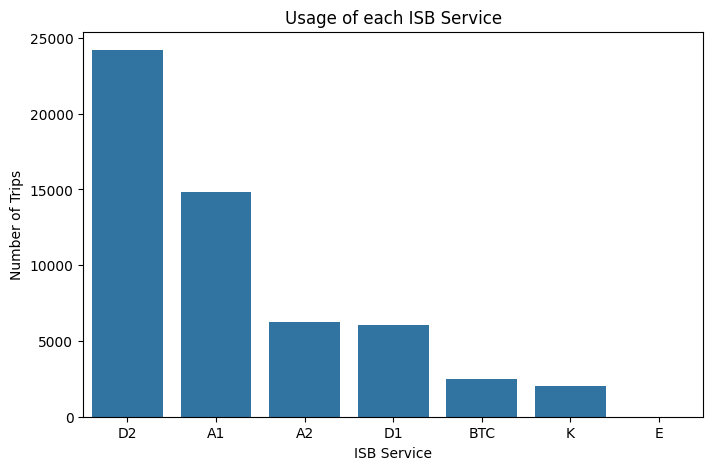

In [2]:
plt.figure(figsize = (8, 5))
sns.countplot(data = transformed_data, x = 'ISB_Service',
              order = transformed_data['ISB_Service'].value_counts().index)
plt.title("Usage of each ISB Service")
plt.xlabel("ISB Service")
plt.ylabel("Number of Trips")
plt.show()

We need to check the number of entries for the bus service "E".

In [3]:
print(sum(transformed_data['ISB_Service'] == 'E'))

2


Compared to the size of our data set, this quantity is numerically insignificant and so we shall omit it for ease of visualisation in further sections.

In [4]:
transformed_data = transformed_data.loc[transformed_data['ISB_Service'] != 'E']

### Bus Usage on Each Day

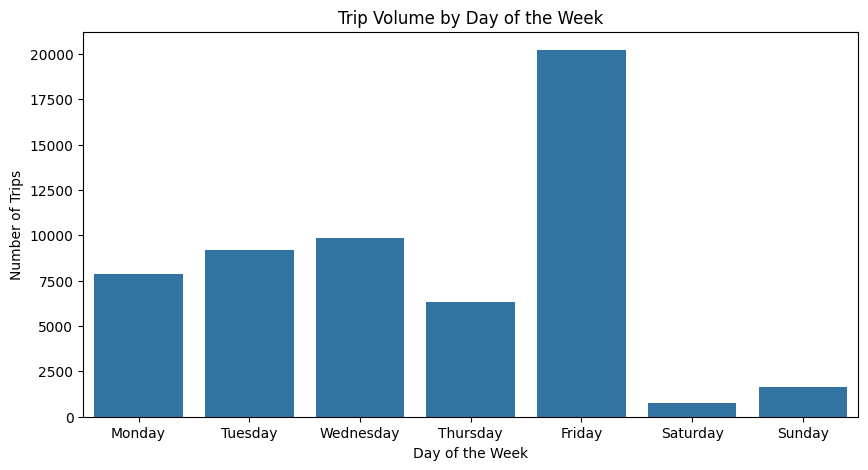

In [5]:
plt.figure(figsize = (10, 5))
sns.countplot(data = transformed_data, x = 'day_of_the_week',
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trip Volume by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.show()

### Travel Patterns across the Average Day

C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\3647581313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['hour'] = transformed_data['time_start'].dt.hour


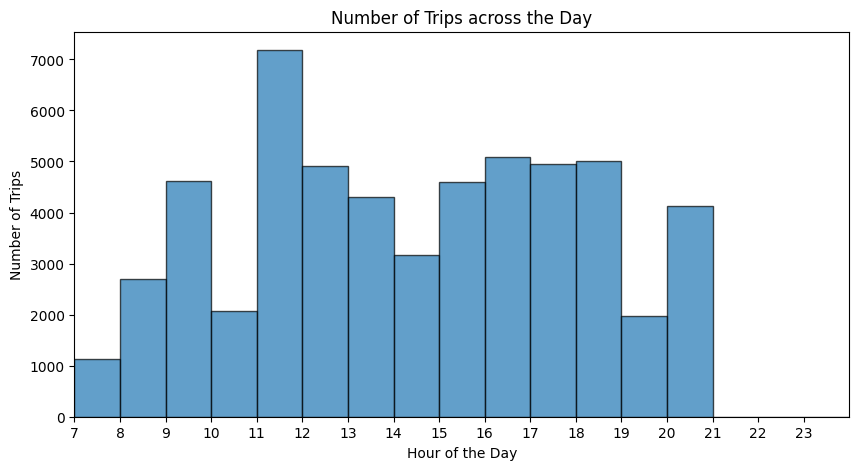

In [6]:
# Trips per hour (based on user-submitted "most common trips")
transformed_data['hour'] = transformed_data['time_start'].dt.hour
plt.figure(figsize = (10, 5))
plt.hist(transformed_data['hour'], bins = range(0, 25), alpha = 0.7, edgecolor = 'black')
plt.title("Number of Trips across the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(7, 24))
plt.xlim(7, 24)
plt.show()

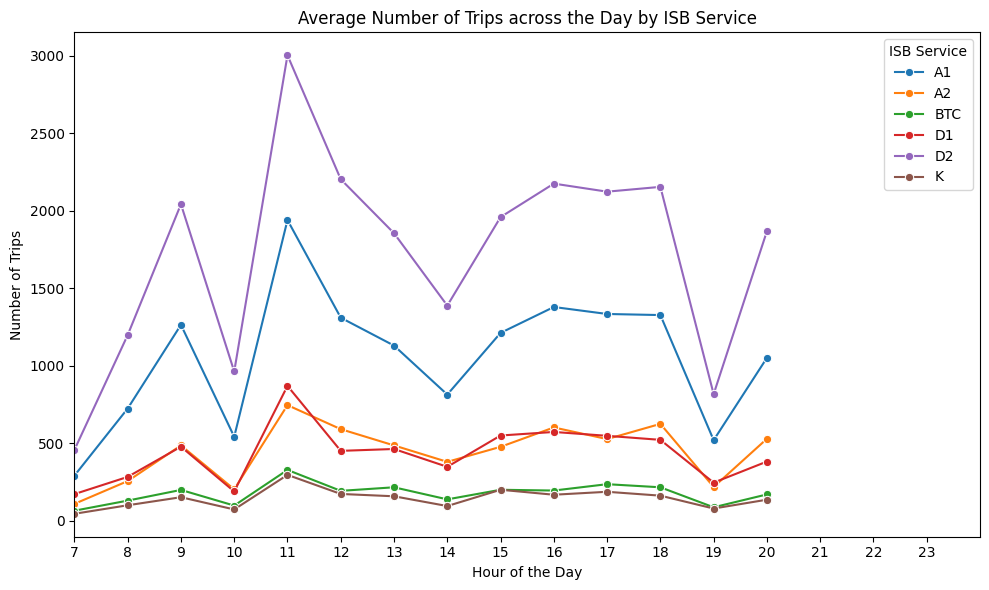

In [7]:
hourly_trips = transformed_data.groupby(['ISB_Service', 'hour']).size().reset_index(name = 'Number of Trips')

plt.figure(figsize = (10, 6))
sns.lineplot(data = hourly_trips, x = 'hour', y = 'Number of Trips', hue = 'ISB_Service', marker = 'o')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Average Number of Trips across the Day by ISB Service")
plt.xticks(range(7, 24))
plt.xlim(7, 24)
plt.legend(title = 'ISB Service')
plt.tight_layout()

plt.show()

### Observing Trends for each Day

C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\2609675285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['day_of_the_week'] = pd.Categorical(
C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\2609675285.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trips = transformed_data.groupby(


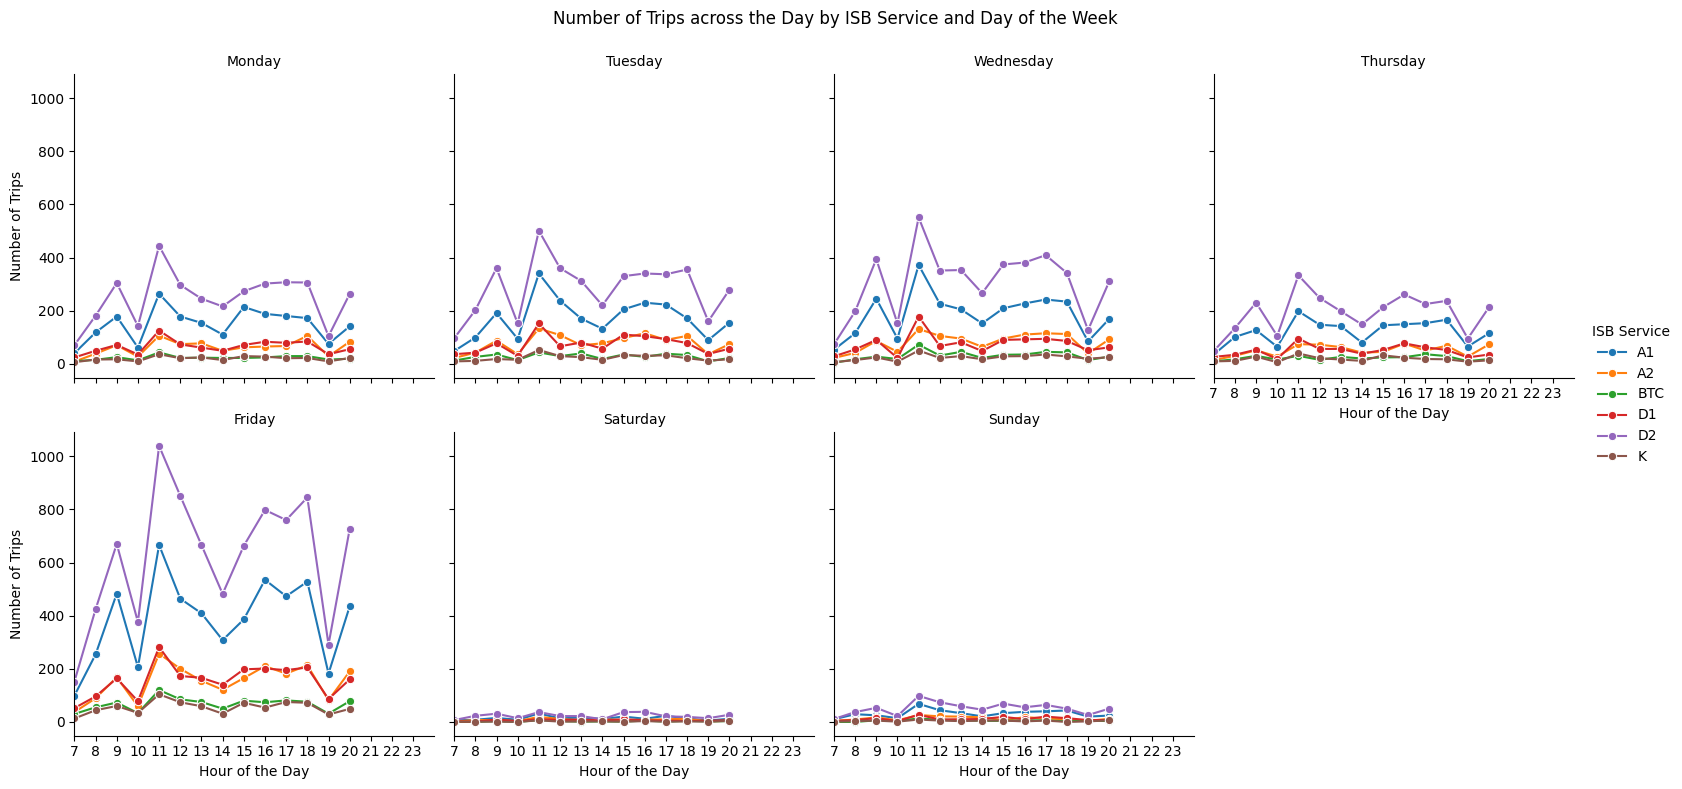

In [8]:
# Ordering days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transformed_data['day_of_the_week'] = pd.Categorical(
    transformed_data['day_of_the_week'], categories = day_order, ordered = True)

hourly_trips = transformed_data.groupby(
    ['day_of_the_week', 'ISB_Service', 'hour']).size().reset_index(name = 'Number of Trips')

# Set up FacetGrid to create a facet for each day of the week
g = sns.FacetGrid(hourly_trips, col = 'day_of_the_week', 
                  col_wrap = 4, height = 4, sharey = True, col_order = day_order)
g.map_dataframe(sns.lineplot, x = 'hour', y = 'Number of Trips', hue = 'ISB_Service', marker = 'o')

g.set_axis_labels("Hour of the Day", "Number of Trips")
g.set_titles("{col_name}")
g.add_legend(title="ISB Service")
for ax in g.axes.flat:
    ax.set_xticks(range(7, 24)) 
    ax.set_xlim(7, 24)
    ax.tick_params(axis = 'x')

plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Trips across the Day by ISB Service and Day of the Week")

plt.show()

### Distribution of Travel Durations for Trips using each Bus Service

C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\1016918490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['travel_duration'] = pd.Categorical(
C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\1016918490.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_data = transformed_data.groupby(
c:\Users\owenl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

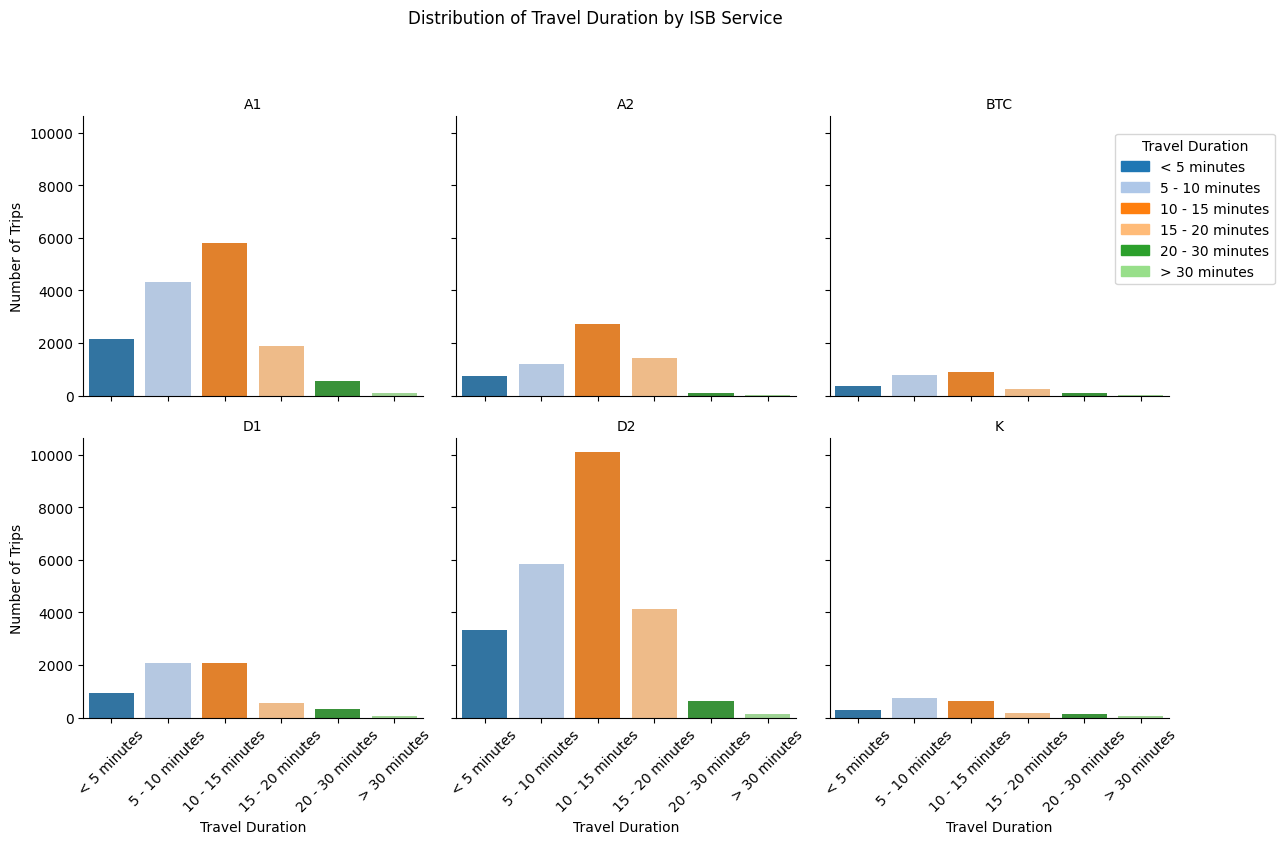

In [9]:
import matplotlib.patches as mpatches

# Setting an ordering for travel_duration
travel_duration_order = ['< 5 minutes', '5 - 10 minutes',
                         '10 - 15 minutes', '15 - 20 minutes',
                         '20 - 30 minutes', '> 30 minutes']
transformed_data['travel_duration'] = pd.Categorical(
    transformed_data['travel_duration'], categories = travel_duration_order, ordered = True)

# Count the number of trips by ISB_Service and travel_duration
segmentation_data = transformed_data.groupby(
    ['ISB_Service', 'travel_duration']).size().reset_index(name = 'count')

# Create a FacetGrid with a bar plot for each ISB_Service
g = sns.FacetGrid(segmentation_data, col = 'ISB_Service', col_wrap = 3, height = 4, sharey = True)
g.map_dataframe(sns.barplot, x = 'travel_duration', y = 'count',
                order = travel_duration_order, palette = "tab20")

g.set_titles("{col_name}")
g.set_axis_labels("Travel Duration", "Number of Trips")
for ax in g.axes.flat:
    ax.tick_params(axis = 'x', rotation = 45)

g.fig.suptitle("Distribution of Travel Duration by ISB Service", y = 1.05)
plt.tight_layout()

# Manually create a legend for travel_duration
handles = [mpatches.Patch(
    color = sns.color_palette("tab20")[i],
    label = travel_duration_order[i]) for i in range(len(travel_duration_order))]
g.fig.legend(handles = handles, title = 'Travel Duration',
             loc = 'center', bbox_to_anchor = (1, 0.8), ncol = 1)

plt.show()

### Overall Activity at each Bus Stop

In [10]:
# New data frame to sort/rank bus stops by usage (boarding and alighting)
start_counts = transformed_data['bus_stop_board'].value_counts()
end_counts = transformed_data['bus_stop_alight'].value_counts()

all_bus_stops = pd.Index(start_counts.index).union(end_counts.index)

bus_stops = pd.DataFrame({
    'bus_stop': all_bus_stops,
    'start_count': start_counts.reindex(all_bus_stops, fill_value=0),
    'end_count': end_counts.reindex(all_bus_stops, fill_value=0),
})

bus_stops['total_count'] = bus_stops['start_count'] + bus_stops['end_count']
bus_stops = bus_stops.sort_values(by = 'total_count', ascending = False).reset_index(drop = True)

bus_stops

,bus_stop,start_count,end_count,total_count
0,KR MRT,24540,1230,25770
1,CLB,467,12677,13144
2,UTown,4423,7491,11914
3,LT27,3263,8348,11611
4,COM3,2971,6671,9642
5,Opp KR MRT,3092,5712,8804
6,KR Bus Terminal,1979,2227,4206
7,S17,1723,2467,4190
8,IT,3457,0,3457
9,PGP Terminal,3171,0,3171


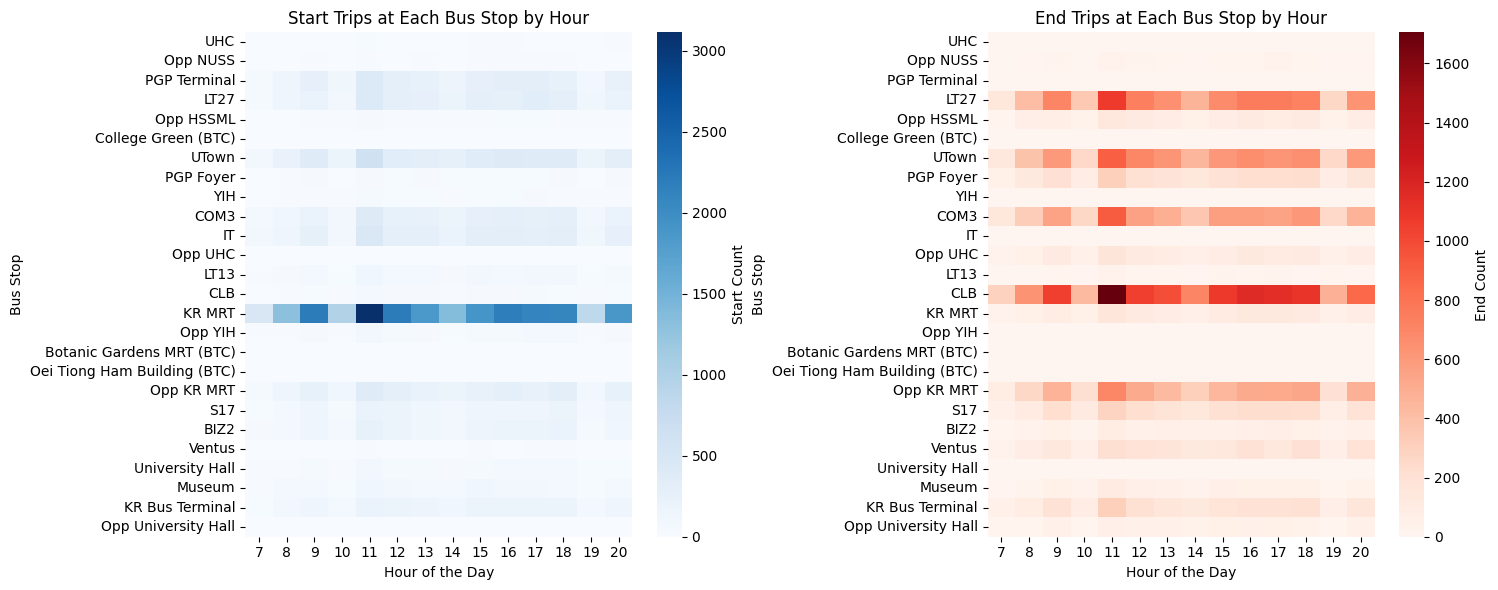

In [11]:
def plot_hourly_trip_counts(data):
    # Count start trips (boarding) and end trips (alighting) at each bus stop for each hour
    start_counts = data.groupby(['bus_stop_board', 'hour']).size().unstack(fill_value=0)
    end_counts = data.groupby(['bus_stop_alight', 'hour']).size().unstack(fill_value=0)
    all_bus_stops = set(start_counts.index).union(set(end_counts.index))
    
    start_counts = start_counts.reindex(all_bus_stops, fill_value=0)
    end_counts = end_counts.reindex(all_bus_stops, fill_value=0)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot for start trips
    sns.heatmap(start_counts, cmap='Blues', cbar_kws={'label': 'Start Count'}, ax=axes[0])
    axes[0].set_title('Start Trips at Each Bus Stop by Hour')
    axes[0].set_xlabel('Hour of the Day')
    axes[0].set_ylabel('Bus Stop')
    
    # Plot for end trips
    sns.heatmap(end_counts, cmap='Reds', cbar_kws={'label': 'End Count'}, ax=axes[1])
    axes[1].set_title('End Trips at Each Bus Stop by Hour')
    axes[1].set_xlabel('Hour of the Day')
    axes[1].set_ylabel('Bus Stop')
    plt.tight_layout()
    plt.show()

plot_hourly_trip_counts(transformed_data)

### Bus Stop Usage split by Service

<Figure size 1000x500 with 0 Axes>

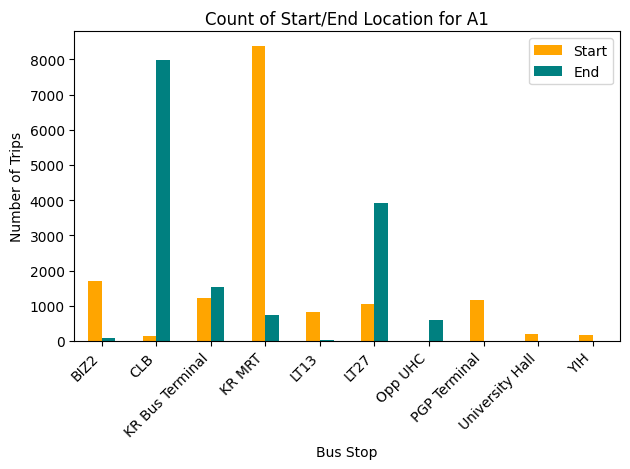

<Figure size 1000x500 with 0 Axes>

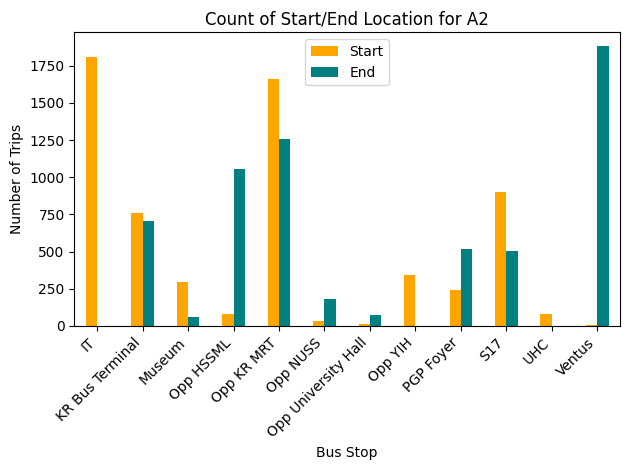

<Figure size 1000x500 with 0 Axes>

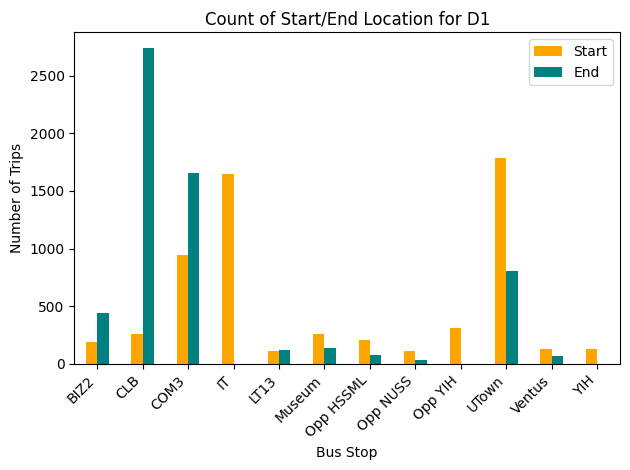

<Figure size 1000x500 with 0 Axes>

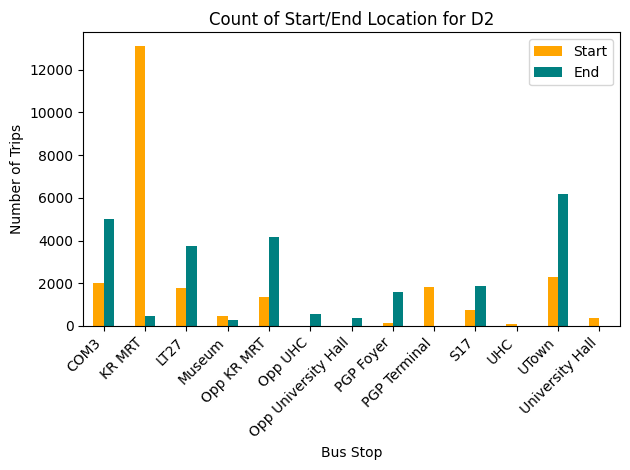

<Figure size 1000x500 with 0 Axes>

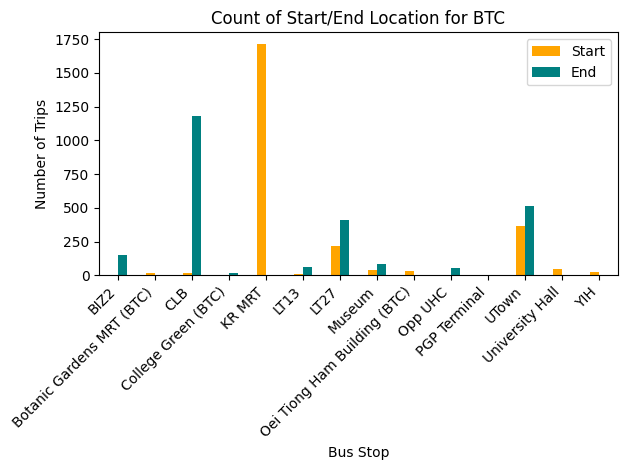

<Figure size 1000x500 with 0 Axes>

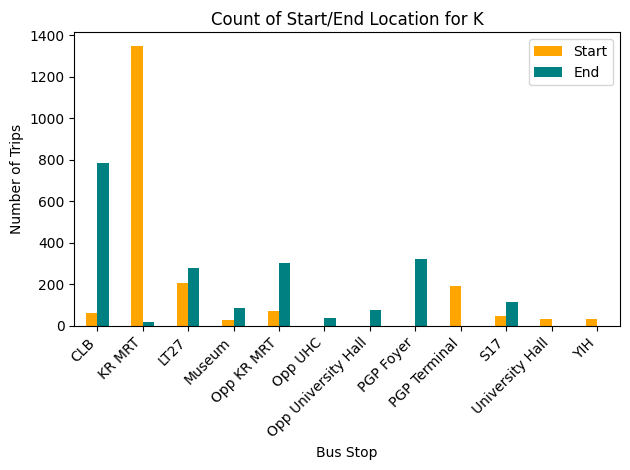

In [12]:
from collections import Counter

# Bus stops for each bus service
A1_bus = ['KR Bus Terminal', 'LT13', 'AS5', 'BIZ2', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 
          'University Hall', 'Opp UHC', 'YIH', 'CLB', 'KR Bus Terminal']
A2_bus = ['KR Bus Terminal', 'IT', 'Opp YIH', 'Museum', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer', 'TCOMS', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'KR Bus Terminal']
D1_bus = ['COM3', 'Opp HSSML', 'Opp NUSS', 'Ventus', 'IT', 'Opp YIH', 'Museum', 'UTown', 'YIH', 'CLB', 'LT13', 'AS5', 'BIZ2', 'COM3']
D2_bus = ['COM3', 'Opp TCOMS', 'PGP Terminal', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'Museum', 'UTown', 'UHC', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer', 'TCOMS', 'COM3']
BTC_bus = ['Oei Tiong Ham Building (BTC)', 'Botanic Gardens MRT (BTC)', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'UTown', 'Raffles Hall', 'Kent Vale', 'Museum', 'YIH', 'CLB', 'LT13', 'AS5', 'BIZ2', 'PGP Terminal', 'College Green (BTC)', 'Oei Tiong Ham Building (BTC)']
E_bus = ['UTown', 'Raffles Hall', 'Kent Vale', 'EA', 'SDE3', 'IT', 'Opp YIH', 'UTown']
K_bus = ['PGP Terminal', 'KR MRT', 'LT27', 'University Hall', 'Opp UHC', 'YIH', 'CLB', 'Opp SDE3', 'The Japanese Primary School', 'Kent Vale', 'Museum', 'University Health Centre', 'Opp University Hall', 'S17', 'Opp KR MRT', 'PGP Foyer']

bus_service_stops = {
    'A1': A1_bus,
    'A2': A2_bus,
    'D1': D1_bus,
    'D2': D2_bus,
    'BTC': BTC_bus,
    'K': K_bus
}

# Function to plot the count of start/end points for each bus stop, split by bus service
def plot_trip_counts(data, bus_service_stops):
    for service, stops in bus_service_stops.items():
        trips = data[data['ISB_Service'] == service]
        start_counter = Counter()
        end_counter = Counter()

        # Count the occurrences of start and end points
        for _, row in trips.iterrows():
            if row['bus_stop_board'] in stops:
                start_counter[row['bus_stop_board']] += 1
            if row['bus_stop_alight'] in stops:
                end_counter[row['bus_stop_alight']] += 1

        start_df = pd.DataFrame(start_counter.items(), columns = ['Bus Stop', 'Start Count'])
        end_df = pd.DataFrame(end_counter.items(), columns = ['Bus Stop', 'End Count'])

        merged_df = pd.merge(start_df, end_df, on = 'Bus Stop', how = 'outer').fillna(0)
        
        plt.figure(figsize = (10, 5))
        merged_df.set_index('Bus Stop').plot(kind = 'bar', stacked = False, color = ['orange', 'teal'])
        
        plt.title(f"Count of Start/End Location for {service}")
        plt.xlabel("Bus Stop")
        plt.ylabel("Number of Trips")
        plt.xticks(rotation = 45, ha = 'right')
        plt.legend(["Start", "End"])
        plt.tight_layout()
        plt.show()

plot_trip_counts(transformed_data, bus_service_stops)

### Accounting for Segmentation by Purpose of Usage

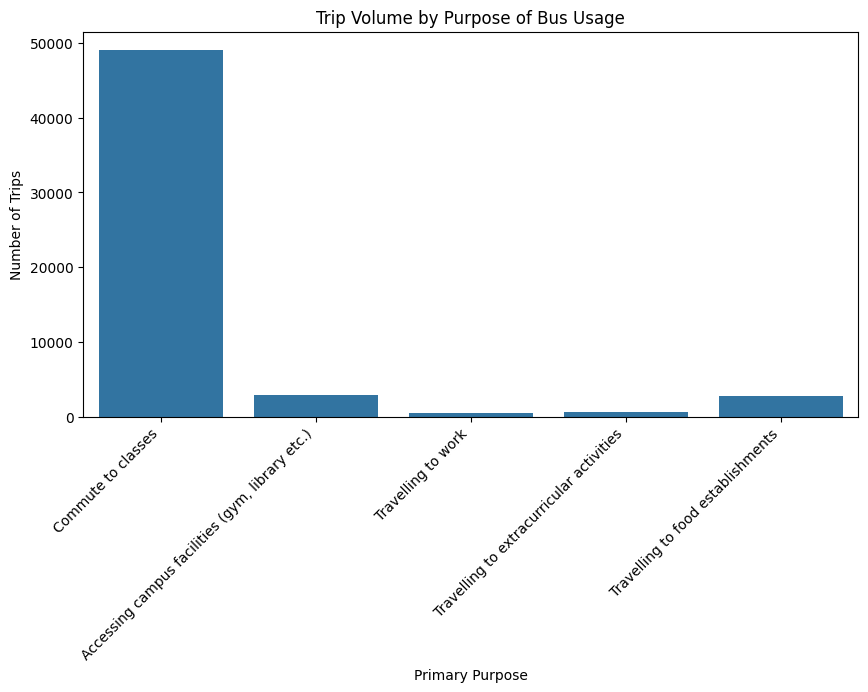

In [13]:
plt.figure(figsize = (10, 5))
sns.countplot(data = transformed_data, x = 'primary_purpose')
plt.title("Trip Volume by Purpose of Bus Usage")
plt.xlabel("Primary Purpose")
plt.ylabel("Number of Trips")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\2959638750.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  transformed_data['time_interval'] = transformed_data['time_start'].dt.floor('10T')
C:\Users\owenl\AppData\Local\Temp\ipykernel_7744\2959638750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['time_interval'] = transformed_data['time_start'].dt.floor('10T')


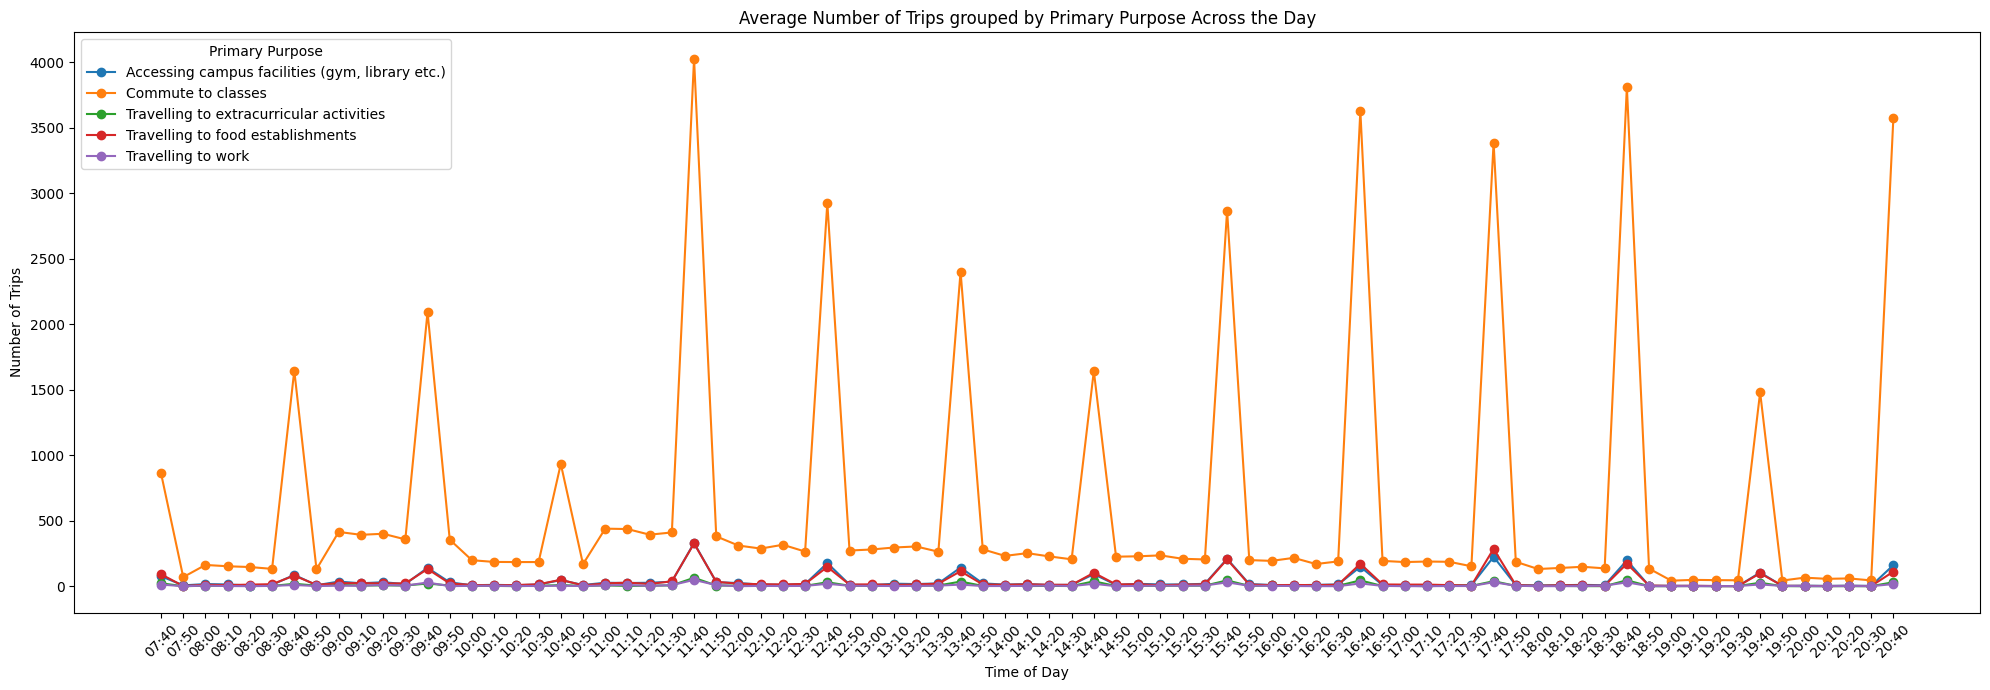

In [14]:
# Rounding time_start to the lowest 10 minute interval
transformed_data['time_interval'] = transformed_data['time_start'].dt.floor('10T')
trip_counts = transformed_data.groupby(['time_interval', 'primary_purpose']).size().unstack(fill_value=0)

plt.figure(figsize = (20, 7))
for purpose in trip_counts.columns:
    plt.plot(trip_counts.index, trip_counts[purpose], marker='o', label=purpose)

plt.title("Average Number of Trips grouped by Primary Purpose Across the Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Trips")
plt.legend(title = "Primary Purpose")
plt.xticks(ticks = trip_counts.index, 
           labels = [time.time().strftime("%H:%M") for time in trip_counts.index], rotation = 45)
plt.tight_layout()
plt.show()

### Heatmap Generation of Frequently-Used Bus Stops across Time of Day, split by Primary Purpose

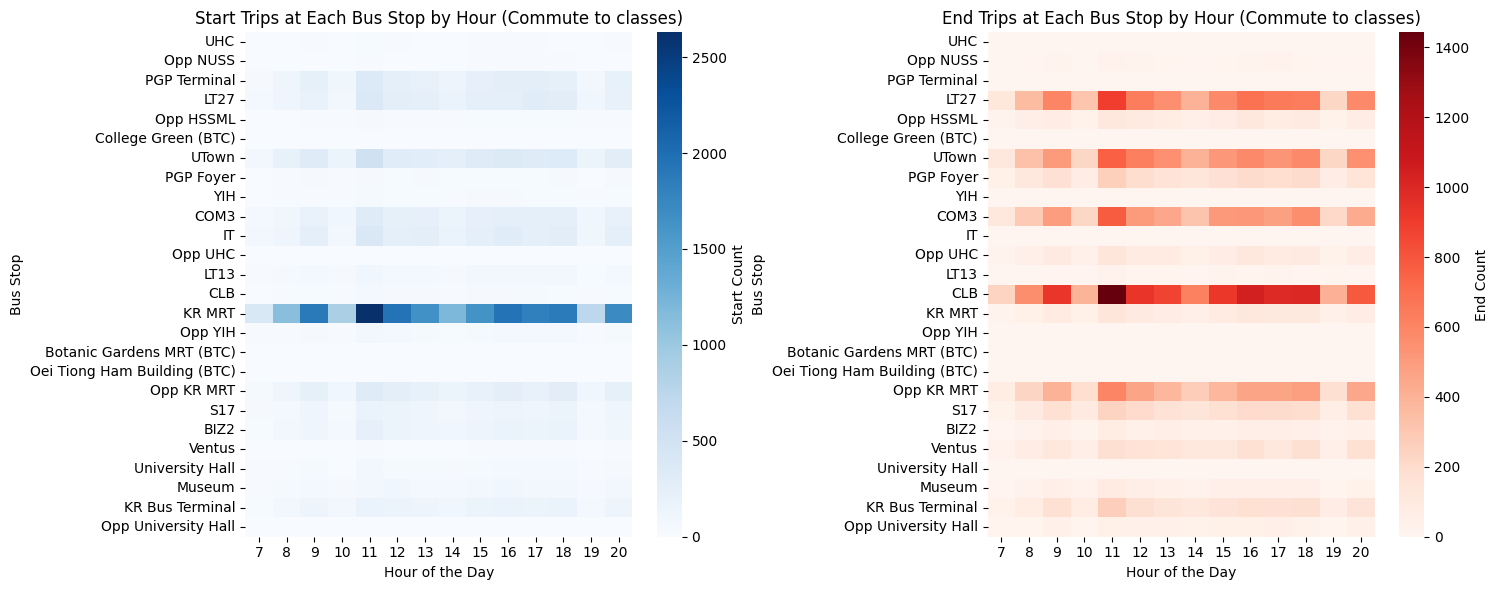

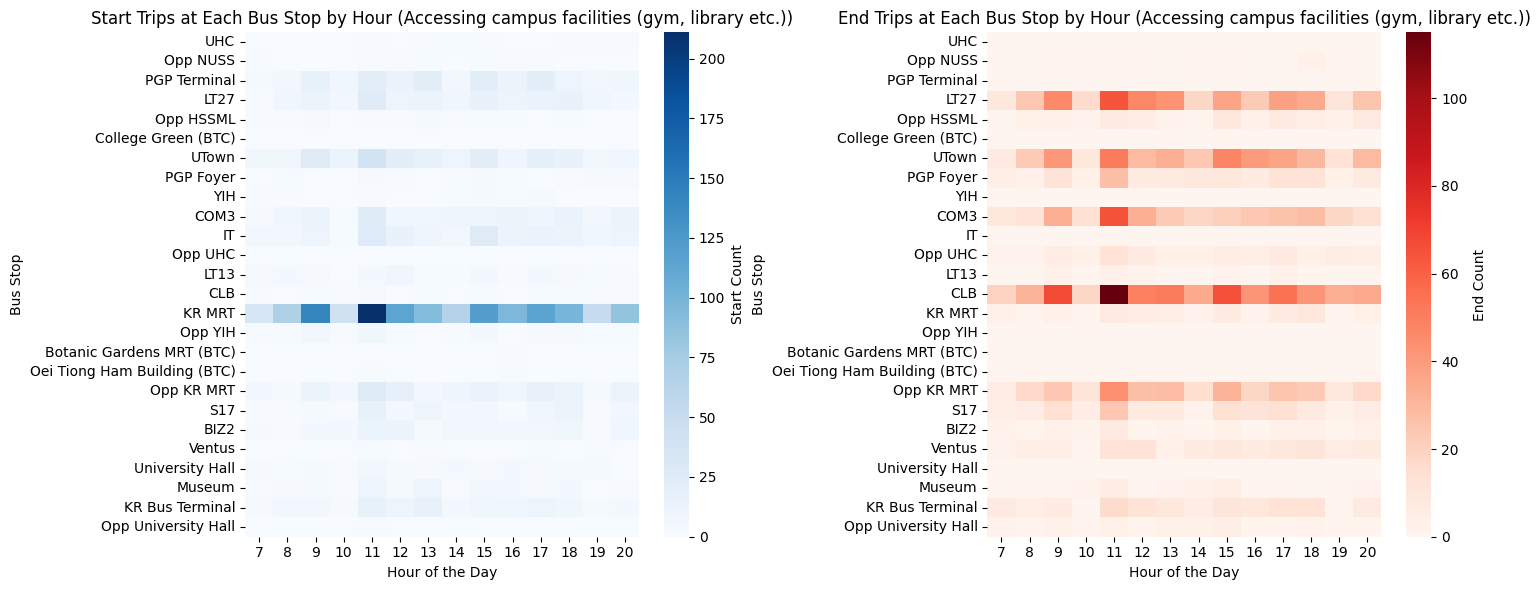

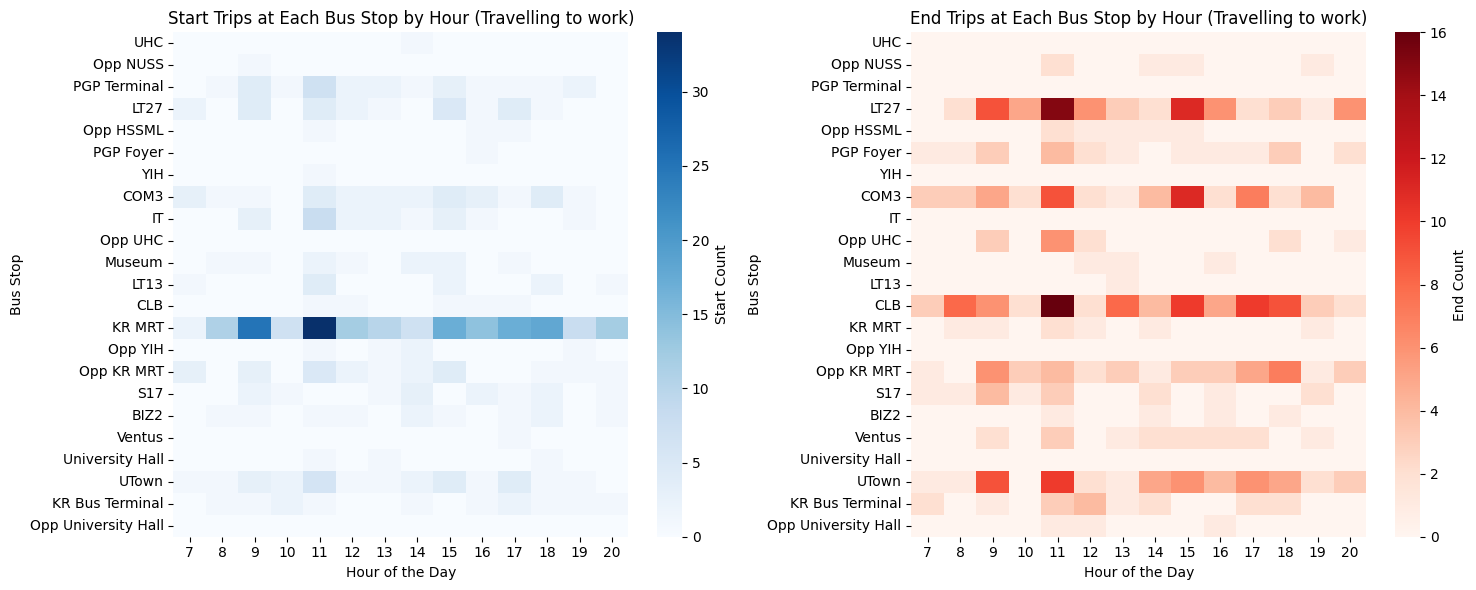

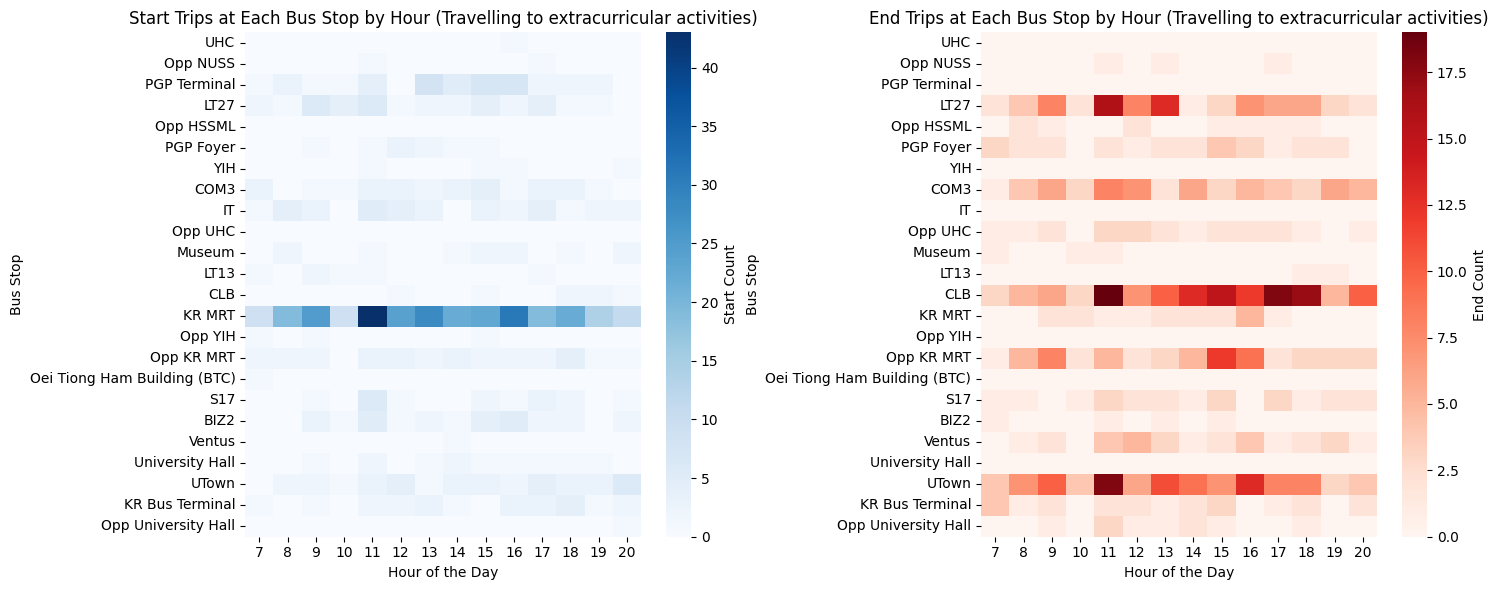

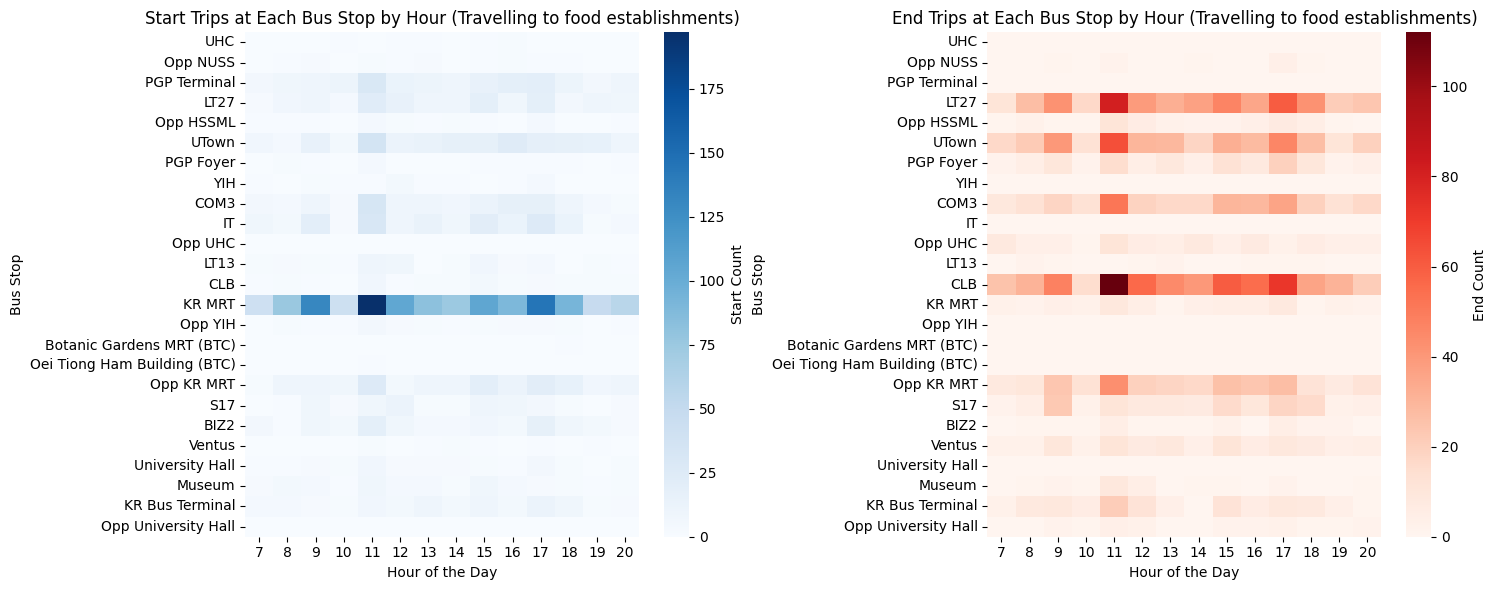

In [15]:
def plot_hourly_trip_counts_by_purpose(data):
    for purpose in data['primary_purpose'].unique():
        purpose_data = data[data['primary_purpose'] == purpose]
        
        # Count start trips (boarding) and end trips (alighting) at each bus stop for each hour
        start_counts = purpose_data.groupby(['bus_stop_board', 'hour']).size().unstack(fill_value = 0)
        end_counts = purpose_data.groupby(['bus_stop_alight', 'hour']).size().unstack(fill_value = 0)
        
        # Ensure all bus stops are included in both start and end counts
        all_bus_stops = set(start_counts.index).union(set(end_counts.index))
        start_counts = start_counts.reindex(all_bus_stops, fill_value = 0)
        end_counts = end_counts.reindex(all_bus_stops, fill_value = 0)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # For start
        sns.heatmap(start_counts, cmap = 'Blues', cbar_kws = {'label': 'Start Count'}, ax = axes[0])
        axes[0].set_title(f'Start Trips at Each Bus Stop by Hour ({purpose})')
        axes[0].set_xlabel('Hour of the Day')
        axes[0].set_ylabel('Bus Stop')
        
        # For end
        sns.heatmap(end_counts, cmap = 'Reds', cbar_kws = {'label': 'End Count'}, ax = axes[1])
        axes[1].set_title(f'End Trips at Each Bus Stop by Hour ({purpose})')
        axes[1].set_xlabel('Hour of the Day')
        axes[1].set_ylabel('Bus Stop')
        
        plt.tight_layout()
        plt.show()

plot_hourly_trip_counts_by_purpose(transformed_data)